# 시계열 데이터 예측
> 505일의 5열의 데이터를 7일간 쪼개서 8일차 종가를 rnn으로 예측한다.-> many to one   
> 

In [1]:
import torch
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Random seed to make results deterministic and reproducible
torch.manual_seed(0)

In [3]:
# scaling function for input data
def minmax_scaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)

In [4]:
# make dataset to input
# 데이터를 7 sequence로 쪼개서 저장
# 7일간의 데이터로 8일의 데이터를 맞추는 형식

def build_dataset(time_series, seq_length):
    dataX = []
    dataY = []
    for i in range(0, len(time_series) - seq_length):
        _x = time_series[i:i + seq_length, :]
        _y = time_series[i + seq_length, [-1]]  # Next close price
        print(_x, "->", _y)
        dataX.append(_x)
        dataY.append(_y)
    return np.array(dataX), np.array(dataY)

In [5]:
# hyper parameters
seq_length = 7
data_dim = 5
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
iterations = 500

In [6]:
xy = np.loadtxt("data-02-stock_daily.csv", delimiter=",")
xy = xy[::-1]  # reverse order
print(xy.shape)

(732, 5)


In [7]:
# load data
xy = np.loadtxt("data-02-stock_daily.csv", delimiter=",")
xy = xy[::-1]  # reverse order

# split train-test set
train_size = int(len(xy) * 0.7)
train_set = xy[0:train_size]
test_set = xy[train_size - seq_length:]

# scaling data
train_set = minmax_scaler(train_set)
test_set = minmax_scaler(test_set)

# make train-test dataset to input
trainX, trainY = build_dataset(train_set, seq_length)
testX, testY = build_dataset(test_set, seq_length)

# convert to tensor
trainX_tensor = torch.FloatTensor(trainX)
trainY_tensor = torch.FloatTensor(trainY)

testX_tensor = torch.FloatTensor(testX)
testY_tensor = torch.FloatTensor(testY)

[[2.53065030e-01 2.45070970e-01 2.33983036e-01 4.66075110e-04
  2.32039560e-01]
 [2.29604366e-01 2.39728936e-01 2.54567513e-01 2.98467330e-03
  2.37426028e-01]
 [2.49235510e-01 2.41668371e-01 2.48338489e-01 2.59926504e-04
  2.26793794e-01]
 [2.21013495e-01 2.46602231e-01 2.54710584e-01 0.00000000e+00
  2.62668239e-01]
 [3.63433786e-01 3.70389871e-01 2.67168847e-01 1.24764722e-02
  2.62105010e-01]
 [2.59447633e-01 3.10673724e-01 2.74113889e-01 4.56323384e-01
  2.71751265e-01]
 [2.76008150e-01 2.78314566e-01 1.98470380e-01 5.70171193e-01
  1.78104644e-01]] -> [0.16053716]
[[2.29604366e-01 2.39728936e-01 2.54567513e-01 2.98467330e-03
  2.37426028e-01]
 [2.49235510e-01 2.41668371e-01 2.48338489e-01 2.59926504e-04
  2.26793794e-01]
 [2.21013495e-01 2.46602231e-01 2.54710584e-01 0.00000000e+00
  2.62668239e-01]
 [3.63433786e-01 3.70389871e-01 2.67168847e-01 1.24764722e-02
  2.62105010e-01]
 [2.59447633e-01 3.10673724e-01 2.74113889e-01 4.56323384e-01
  2.71751265e-01]
 [2.76008150e-01 2.7831

 [0.31426977 0.30565469 0.31861207 0.14476114 0.32470042]] -> [0.31723685]
[[0.286393   0.28429655 0.28129162 0.17044008 0.27650404]
 [0.26541637 0.27474183 0.29289407 0.09938155 0.29407152]
 [0.24585427 0.2742995  0.27726411 0.12089271 0.27653916]
 [0.26655492 0.28879475 0.30021137 0.14464462 0.30498538]
 [0.30343643 0.30363029 0.32387464 0.16546563 0.32501716]
 [0.31426977 0.30565469 0.31861207 0.14476114 0.32470042]
 [0.32206712 0.31448449 0.33880282 0.12451376 0.31723685]] -> [0.28579823]
[[0.26541637 0.27474183 0.29289407 0.09938155 0.29407152]
 [0.24585427 0.2742995  0.27726411 0.12089271 0.27653916]
 [0.26655492 0.28879475 0.30021137 0.14464462 0.30498538]
 [0.30343643 0.30363029 0.32387464 0.16546563 0.32501716]
 [0.31426977 0.30565469 0.31861207 0.14476114 0.32470042]
 [0.32206712 0.31448449 0.33880282 0.12451376 0.31723685]
 [0.29284465 0.28927102 0.29015181 0.2696603  0.28579823]] -> [0.36096206]
[[0.24585427 0.2742995  0.27726411 0.12089271 0.27653916]
 [0.26655492 0.288794

 [0.28104527 0.30124832 0.3166073  0.11438559 0.31547648]] -> [0.33202308]
[[0.25993076 0.25354342 0.28080828 0.10816528 0.265203  ]
 [0.24105872 0.23792549 0.26247901 0.13750112 0.24707228]
 [0.25068446 0.26888937 0.27991326 0.12828717 0.28949478]
 [0.28128683 0.2787571  0.29827824 0.08761316 0.28903713]
 [0.28708306 0.28379279 0.2969895  0.1354486  0.28491826]
 [0.28104527 0.30124832 0.3166073  0.11438559 0.31547648]
 [0.31171669 0.31087781 0.34524656 0.08700367 0.33202308]] -> [0.32367932]
[[0.24105872 0.23792549 0.26247901 0.13750112 0.24707228]
 [0.25068446 0.26888937 0.27991326 0.12828717 0.28949478]
 [0.28128683 0.2787571  0.29827824 0.08761316 0.28903713]
 [0.28708306 0.28379279 0.2969895  0.1354486  0.28491826]
 [0.28104527 0.30124832 0.3166073  0.11438559 0.31547648]
 [0.31171669 0.31087781 0.34524656 0.08700367 0.33202308]
 [0.3147529  0.30870014 0.34012728 0.09221117 0.32367932]] -> [0.31973648]
[[0.25068446 0.26888937 0.27991326 0.12828717 0.28949478]
 [0.28128683 0.278757

 [0.00810774 0.03751064 0.03311417 0.25770368 0.0434436 ]] -> [0.06530621]
[[0.1325874  0.13730964 0.13603665 0.15275612 0.11797353]
 [0.114371   0.12910937 0.14154965 0.14366765 0.12600055]
 [0.09957004 0.11066715 0.11133528 0.17805862 0.09192159]
 [0.09691349 0.09229303 0.09203955 0.25145648 0.07481176]
 [0.05834126 0.05809648 0.0051551  0.35460249 0.00999833]
 [0.00810774 0.03751064 0.03311417 0.25770368 0.0434436 ]
 [0.06313692 0.06088662 0.0613597  0.26161154 0.06530621]] -> [0.08378899]
[[0.114371   0.12910937 0.14154965 0.14366765 0.12600055]
 [0.09957004 0.11066715 0.11133528 0.17805862 0.09192159]
 [0.09691349 0.09229303 0.09203955 0.25145648 0.07481176]
 [0.05834126 0.05809648 0.0051551  0.35460249 0.00999833]
 [0.00810774 0.03751064 0.03311417 0.25770368 0.0434436 ]
 [0.06313692 0.06088662 0.0613597  0.26161154 0.06530621]
 [0.05816875 0.0739868  0.06927481 0.33004392 0.08378899]] -> [0.1137842]
[[0.09957004 0.11066715 0.11133528 0.17805862 0.09192159]
 [0.09691349 0.0922930

[[0.00100056 0.         0.         0.20783365 0.        ]
 [0.01445593 0.02383205 0.01729096 0.21175047 0.01277958]
 [0.         0.02468275 0.01947473 0.19786681 0.02929095]
 [0.03767514 0.03301921 0.03651515 0.24270861 0.03252986]
 [0.01849259 0.04155976 0.04453411 0.2052792  0.05467408]
 [0.05640918 0.05622504 0.0660708  0.1993457  0.05051987]
 [0.04347125 0.07929489 0.06672952 0.20263512 0.08973891]] -> [0.14729971]
[[0.01445593 0.02383205 0.01729096 0.21175047 0.01277958]
 [0.         0.02468275 0.01947473 0.19786681 0.02929095]
 [0.03767514 0.03301921 0.03651515 0.24270861 0.03252986]
 [0.01849259 0.04155976 0.04453411 0.2052792  0.05467408]
 [0.05640918 0.05622504 0.0660708  0.1993457  0.05051987]
 [0.04347125 0.07929489 0.06672952 0.20263512 0.08973891]
 [0.09256622 0.13730964 0.11505845 0.23922201 0.14729971]] -> [0.16687406]
[[0.         0.02468275 0.01947473 0.19786681 0.02929095]
 [0.03767514 0.03301921 0.03651515 0.24270861 0.03252986]
 [0.01849259 0.04155976 0.04453411 0.2

 [0.10678059 0.13649309 0.13224183 0.14979833 0.15078511]] -> [0.14582117]
[[0.15097653 0.16361205 0.17810062 0.14675988 0.16412814]
 [0.14352421 0.14152899 0.14510105 0.23269696 0.13321763]
 [0.11747605 0.13186556 0.12765957 0.20712557 0.14075166]
 [0.12161618 0.13479168 0.15053518 0.11579278 0.1452226 ]
 [0.11733795 0.11522658 0.11974807 0.19215739 0.11089737]
 [0.10678059 0.13649309 0.13224183 0.14979833 0.15078511]
 [0.14787148 0.14772173 0.1650876  0.16463207 0.14582117]] -> [0.16481462]
[[0.14352421 0.14152899 0.14510105 0.23269696 0.13321763]
 [0.11747605 0.13186556 0.12765957 0.20712557 0.14075166]
 [0.12161618 0.13479168 0.15053518 0.11579278 0.1452226 ]
 [0.11733795 0.11522658 0.11974807 0.19215739 0.11089737]
 [0.10678059 0.13649309 0.13224183 0.14979833 0.15078511]
 [0.14787148 0.14772173 0.1650876  0.16463207 0.14582117]
 [0.13714161 0.15347214 0.15819624 0.14211706 0.16481462]] -> [0.19169395]
[[0.11747605 0.13186556 0.12765957 0.20712557 0.14075166]
 [0.12161618 0.134791

 [0.15697132 0.16404601 0.18596768 0.10471453 0.16742871]] -> [0.14000382]
[[0.15362463 0.14731871 0.15328322 0.17597921 0.14539013]
 [0.12888757 0.13216354 0.14780588 0.17885632 0.13993334]
 [0.13568413 0.15203469 0.16280564 0.17558483 0.15774724]
 [0.15124406 0.15972463 0.16256223 0.12753428 0.16447158]
 [0.14938109 0.16285518 0.17333054 0.13039347 0.17587808]
 [0.15697132 0.16404601 0.18596768 0.10471453 0.16742871]
 [0.14996755 0.14638644 0.15149327 0.21498611 0.14000382]] -> [0.16630211]
[[0.12888757 0.13216354 0.14780588 0.17885632 0.13993334]
 [0.13568413 0.15203469 0.16280564 0.17558483 0.15774724]
 [0.15124406 0.15972463 0.16256223 0.12753428 0.16447158]
 [0.14938109 0.16285518 0.17333054 0.13039347 0.17587808]
 [0.15697132 0.16404601 0.18596768 0.10471453 0.16742871]
 [0.14996755 0.14638644 0.15149327 0.21498611 0.14000382]
 [0.13161306 0.15166045 0.15804454 0.13597741 0.16630211]] -> [0.16626709]
[[0.13568413 0.15203469 0.16280564 0.17558483 0.15774724]
 [0.15124406 0.159724

 [0.48190049 0.51679486 0.52122469 0.20851483 0.53240273]] -> [0.52853001]
[[0.46282141 0.46745697 0.48360018 0.14046787 0.49068426]
 [0.46696156 0.47378579 0.48145211 0.13142422 0.49300793]
 [0.4717227  0.46592576 0.49380279 0.15220938 0.46843445]
 [0.45088425 0.46642273 0.49323011 0.11621404 0.48814958]
 [0.46151036 0.47239081 0.49974532 0.13292104 0.48124925]
 [0.48190049 0.51679486 0.52122469 0.20851483 0.53240273]
 [0.51871286 0.50835313 0.51796708 0.14024379 0.52853001]] -> [0.50254845]
[[0.46696156 0.47378579 0.48145211 0.13142422 0.49300793]
 [0.4717227  0.46592576 0.49380279 0.15220938 0.46843445]
 [0.45088425 0.46642273 0.49323011 0.11621404 0.48814958]
 [0.46151036 0.47239081 0.49974532 0.13292104 0.48124925]
 [0.48190049 0.51679486 0.52122469 0.20851483 0.53240273]
 [0.51871286 0.50835313 0.51796708 0.14024379 0.52853001]
 [0.50225588 0.49916936 0.50887423 0.12512324 0.50254845]] -> [0.49702118]
[[0.4717227  0.46592576 0.49380279 0.15220938 0.46843445]
 [0.45088425 0.466422

 [0.49746042 0.52152455 0.53328914 0.19345702 0.53824672]] -> [0.52740341]
[[0.35407481 0.37095891 0.367504   0.20629201 0.36056521]
 [0.37477533 0.38375277 0.40512873 0.21560455 0.40791645]
 [0.39233616 0.39508353 0.40197841 0.16668459 0.41802037]
 [0.38829962 0.44697338 0.41372056 0.23993009 0.47301111]
 [0.47386173 0.50029228 0.49917263 0.16094828 0.52427009]
 [0.49746042 0.52152455 0.53328914 0.19345702 0.53824672]
 [0.5333412  0.52614873 0.51760918 0.18686027 0.52740341]] -> [0.51613766]
[[0.37477533 0.38375277 0.40512873 0.21560455 0.40791645]
 [0.39233616 0.39508353 0.40197841 0.16668459 0.41802037]
 [0.38829962 0.44697338 0.41372056 0.23993009 0.47301111]
 [0.47386173 0.50029228 0.49917263 0.16094828 0.52427009]
 [0.49746042 0.52152455 0.53328914 0.19345702 0.53824672]
 [0.5333412  0.52614873 0.51760918 0.18686027 0.52740341]
 [0.50615449 0.50519205 0.49401758 0.19487317 0.51613766]] -> [0.53180408]
[[0.39233616 0.39508353 0.40197841 0.16668459 0.41802037]
 [0.38829962 0.446973

 [0.81266032 0.81231195 0.83006228 0.18480774 0.81795327]] -> [0.83002868]
[[0.7466256  0.76777165 0.78144725 0.16836067 0.80464554]
 [0.77353624 0.77808167 0.8132009  0.13959846 0.80834206]
 [0.78436956 0.80683358 0.83890473 0.15226315 0.82928929]
 [0.81014161 0.82854227 0.86600435 0.16614681 0.84034382]
 [0.81714539 0.81469361 0.85719795 0.13477637 0.8491804 ]
 [0.81266032 0.81231195 0.83006228 0.18480774 0.81795327]
 [0.79264985 0.7982932  0.82673301 0.14341669 0.83002868]] -> [0.85495413]
[[0.77353624 0.77808167 0.8132009  0.13959846 0.80834206]
 [0.78436956 0.80683358 0.83890473 0.15226315 0.82928929]
 [0.81014161 0.82854227 0.86600435 0.16614681 0.84034382]
 [0.81714539 0.81469361 0.85719795 0.13477637 0.8491804 ]
 [0.81266032 0.81231195 0.83006228 0.18480774 0.81795327]
 [0.79264985 0.7982932  0.82673301 0.14341669 0.83002868]
 [0.82045755 0.83371431 0.8687251  0.12176212 0.85495413]] -> [0.84027334]
[[0.78436956 0.80683358 0.83890473 0.15226315 0.82928929]
 [0.81014161 0.828542

 [0.88255911 0.89108232 0.91540707 0.45991754 0.91339492]] -> [0.95792978]
[[0.78982076 0.7951967  0.79633974 0.1527113  0.77141169]
 [0.75625127 0.75640704 0.7837026  0.11865197 0.7762348 ]
 [0.75563028 0.75625377 0.7404218  0.19595769 0.73029186]
 [0.78512848 0.80884121 0.80471657 0.2391772  0.83932294]
 [0.81724899 0.8472907  0.85644609 0.31069284 0.88153412]
 [0.88255911 0.89108232 0.91540707 0.45991754 0.91339492]
 [1.         1.         0.99194524 0.56827104 0.95792978]] -> [0.82520556]
[[0.75625127 0.75640704 0.7837026  0.11865197 0.7762348 ]
 [0.75563028 0.75625377 0.7404218  0.19595769 0.73029186]
 [0.78512848 0.80884121 0.80471657 0.2391772  0.83932294]
 [0.81724899 0.8472907  0.85644609 0.31069284 0.88153412]
 [0.88255911 0.89108232 0.91540707 0.45991754 0.91339492]
 [1.         1.         0.99194524 0.56827104 0.95792978]
 [0.95073266 0.94770185 0.8338928  0.5523976  0.82520556]] -> [0.75852662]
[[0.75563028 0.75625377 0.7404218  0.19595769 0.73029186]
 [0.78512848 0.808841

 [0.85288824 0.83711692 0.87445306 0.26645156 0.86269913]] -> [0.87850652]
[[0.77746939 0.78580546 0.82181065 0.17593439 0.82474788]
 [0.80096447 0.81499994 0.85053939 0.15330286 0.83766818]
 [0.80134393 0.80407747 0.84917902 0.15354486 0.83006392]
 [0.79944642 0.82170299 0.84824821 0.14488662 0.85738331]
 [0.83422336 0.84075774 0.88938117 0.16607511 0.86333302]
 [0.85288824 0.83711692 0.87445306 0.26645156 0.86269913]
 [0.83439582 0.83881823 0.88048867 0.1638971  0.87850652]] -> [0.8737889]
[[0.80096447 0.81499994 0.85053939 0.15330286 0.83766818]
 [0.80134393 0.80407747 0.84917902 0.15354486 0.83006392]
 [0.79944642 0.82170299 0.84824821 0.14488662 0.85738331]
 [0.83422336 0.84075774 0.88938117 0.16607511 0.86333302]
 [0.85288824 0.83711692 0.87445306 0.26645156 0.86269913]
 [0.83439582 0.83881823 0.88048867 0.1638971  0.87850652]
 [0.83770798 0.84732476 0.89460789 0.11309492 0.8737889 ]] -> [0.86431866]
[[0.80134393 0.80407747 0.84917902 0.15354486 0.83006392]
 [0.79944642 0.8217029

 [0.26970799 0.29012688 0.24733133 0.26373954 0.22680829]] -> [0.22919778]
[[0.27426414 0.30179785 0.31766676 0.18330569 0.32805682]
 [0.31418964 0.30757433 0.29997696 0.20613504 0.28092692]
 [0.27612253 0.27674627 0.27695594 0.14437466 0.26909979]
 [0.24536894 0.26149126 0.27853113 0.13576474 0.25428597]
 [0.22858345 0.2722074  0.25666117 0.13624928 0.28809502]
 [0.26970799 0.29012688 0.24733133 0.26373954 0.22680829]
 [0.19585147 0.2316533  0.22624897 0.22005628 0.22919778]] -> [0.1915059]
[[0.31418964 0.30757433 0.29997696 0.20613504 0.28092692]
 [0.27612253 0.27674627 0.27695594 0.14437466 0.26909979]
 [0.24536894 0.26149126 0.27853113 0.13576474 0.25428597]
 [0.22858345 0.2722074  0.25666117 0.13624928 0.28809502]
 [0.26970799 0.29012688 0.24733133 0.26373954 0.22680829]
 [0.19585147 0.2316533  0.22624897 0.22005628 0.22919778]
 [0.18799823 0.19864431 0.20304603 0.20205371 0.1915059 ]] -> [0.24777484]
[[0.27612253 0.27674627 0.27695594 0.14437466 0.26909979]
 [0.24536894 0.2614912

 [0.16647695 0.1778956  0.18250869 0.27889077 0.15202208]] -> [0.16534255]
[[0.27282543 0.31323317 0.32245296 0.12540301 0.29926518]
 [0.27264541 0.29572635 0.30191562 0.1341993  0.29872778]
 [0.28775254 0.2987326  0.32729943 0.11712853 0.30261025]
 [0.26323346 0.26142075 0.24218202 0.26025457 0.2514783 ]
 [0.22570604 0.21526681 0.15247254 0.52487001 0.14013479]
 [0.16647695 0.1778956  0.18250869 0.27889077 0.15202208]
 [0.16425888 0.17960523 0.17402746 0.16392404 0.16534255]] -> [0.17442218]
[[0.27264541 0.29572635 0.30191562 0.1341993  0.29872778]
 [0.28775254 0.2987326  0.32729943 0.11712853 0.30261025]
 [0.26323346 0.26142075 0.24218202 0.26025457 0.2514783 ]
 [0.22570604 0.21526681 0.15247254 0.52487001 0.14013479]
 [0.16647695 0.1778956  0.18250869 0.27889077 0.15202208]
 [0.16425888 0.17960523 0.17402746 0.16392404 0.16534255]
 [0.16821532 0.16834655 0.18052159 0.1115004  0.17442218]] -> [0.20076453]
[[0.28775254 0.2987326  0.32729943 0.11712853 0.30261025]
 [0.26323346 0.261420

 [0.42479459 0.41815498 0.44391946 0.12557073 0.44489572]] -> [0.42715502]
[[0.32809772 0.31500144 0.33787093 0.12920479 0.30816543]
 [0.30999354 0.37624526 0.35080521 0.13222386 0.39137465]
 [0.35303648 0.38131443 0.39811961 0.11955124 0.41036989]
 [0.39763814 0.41161218 0.44719075 0.13114296 0.43563708]
 [0.41580232 0.40901859 0.43950302 0.0820552  0.4203453 ]
 [0.42479459 0.41815498 0.44391946 0.12557073 0.44489572]
 [0.41766071 0.41444142 0.44961417 0.08319201 0.42715502]] -> [0.41909076]
[[0.30999354 0.37624526 0.35080521 0.13222386 0.39137465]
 [0.35303648 0.38131443 0.39811961 0.11955124 0.41036989]
 [0.39763814 0.41161218 0.44719075 0.13114296 0.43563708]
 [0.41580232 0.40901859 0.43950302 0.0820552  0.4203453 ]
 [0.42479459 0.41815498 0.44391946 0.12557073 0.44489572]
 [0.41766071 0.41444142 0.44961417 0.08319201 0.42715502]
 [0.40788909 0.40901859 0.43004636 0.11194767 0.41909076]] -> [0.43910174]
[[0.35303648 0.38131443 0.39811961 0.11955124 0.41036989]
 [0.39763814 0.411612

 [0.63970999 0.69012673 0.68206664 0.1097486  0.70294493]] -> [0.68580142]
[[0.61896769 0.61164161 0.64347604 0.12911161 0.62302135]
 [0.62963869 0.62723265 0.66401338 0.11468719 0.64613823]
 [0.6493016  0.64703804 0.68073402 0.16310405 0.64637703]
 [0.64744321 0.63766564 0.68006734 0.09032967 0.64870672]
 [0.65139964 0.63283212 0.65104877 0.0647049  0.63807433]
 [0.63970999 0.69012673 0.68206664 0.1097486  0.70294493]
 [0.69336355 0.70722089 0.71060082 0.14657373 0.68580142]] -> [0.70413968]
[[0.62963869 0.62723265 0.66401338 0.11468719 0.64613823]
 [0.6493016  0.64703804 0.68073402 0.16310405 0.64637703]
 [0.64744321 0.63766564 0.68006734 0.09032967 0.64870672]
 [0.65139964 0.63283212 0.65104877 0.0647049  0.63807433]
 [0.63970999 0.69012673 0.68206664 0.1097486  0.70294493]
 [0.69336355 0.70722089 0.71060082 0.14657373 0.68580142]
 [0.67597873 0.68275862 0.71956682 0.06548762 0.70413968]] -> [0.65665139]
[[0.6493016  0.64703804 0.68073402 0.16310405 0.64637703]
 [0.64744321 0.637665

 [0.60925608 0.6169173  0.62833058 0.18744293 0.59739577]] -> [0.55390953]
[[0.45542816 0.5429768  0.50698499 0.32710263 0.53897613]
 [0.50476598 0.55443551 0.5284312  0.16384949 0.5747565 ]
 [0.57502538 0.59180672 0.61154929 0.13063978 0.61507668]
 [0.60170251 0.60536397 0.5859233  0.17521758 0.55122145]
 [0.54918761 0.57412325 0.58955806 0.13734881 0.60295095]
 [0.60925608 0.6169173  0.62833058 0.18744293 0.59739577]
 [0.57988119 0.56577081 0.55714693 0.16612311 0.55390953]] -> [0.55803117]
[[0.50476598 0.55443551 0.5284312  0.16384949 0.5747565 ]
 [0.57502538 0.59180672 0.61154929 0.13063978 0.61507668]
 [0.60170251 0.60536397 0.5859233  0.17521758 0.55122145]
 [0.54918761 0.57412325 0.58955806 0.13734881 0.60295095]
 [0.60925608 0.6169173  0.62833058 0.18744293 0.59739577]
 [0.57988119 0.56577081 0.55714693 0.16612311 0.55390953]
 [0.55907926 0.54641909 0.58907368 0.         0.55803117]] -> [0.59721639]
[[0.57502538 0.59180672 0.61154929 0.13063978 0.61507668]
 [0.60170251 0.605363

 [0.91133638 0.91818448 0.95944078 0.1885611  0.95460261]] -> [0.97604677]


In [8]:
trainX_tensor.shape

torch.Size([505, 7, 5])

In [9]:
class Net(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, layers):
        super(Net, self).__init__()
        self.rnn = torch.nn.LSTM(input_dim, hidden_dim, num_layers=layers, batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, output_dim, bias=True)

    def forward(self, x):
        x, _status = self.rnn(x)
        x = self.fc(x[:, -1])
        return x


net = Net(data_dim, hidden_dim, output_dim, 1) # 5, 10, 1

In [10]:
# loss & optimizer setting
criterion = torch.nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

In [11]:
# start training
for i in range(iterations):

    optimizer.zero_grad()
    outputs = net(trainX_tensor)
    loss = criterion(outputs, trainY_tensor)
    loss.backward()
    optimizer.step()
    print(i, loss.item())

0 0.2271038293838501
1 0.18340936303138733
2 0.15106433629989624
3 0.12612314522266388
4 0.10598734766244888
5 0.08915018290281296
6 0.07493707537651062
7 0.06327902525663376
8 0.05449603125452995
9 0.049023859202861786
10 0.046934422105550766
11 0.04731707274913788
12 0.048382632434368134
13 0.04839477688074112
14 0.046337664127349854
15 0.042077720165252686
16 0.036201704293489456
17 0.029662014916539192
18 0.023386558517813683
19 0.018011244013905525
20 0.01380066480487585
21 0.010714656673371792
22 0.008532218635082245
23 0.006976508069783449
24 0.005824481602758169
25 0.004987423308193684
26 0.004524713847786188
27 0.004554683808237314
28 0.005089897662401199
29 0.005920967552810907
30 0.006684894207865
31 0.007072674576193094
32 0.006973990239202976
33 0.006471903994679451
34 0.005753520876169205
35 0.00501469150185585
36 0.004395289346575737
37 0.003953744191676378
38 0.003676638239994645
39 0.0035109841264784336
40 0.0034013076219707727
41 0.0033151088282465935
42 0.00324889481

326 0.0014468621229752898
327 0.001445250236429274
328 0.0014436455676332116
329 0.0014420469524338841
330 0.0014404556713998318
331 0.0014388709096238017
332 0.0014372931327670813
333 0.001435721293091774
334 0.0014341562055051327
335 0.0014325982192531228
336 0.0014310459373518825
337 0.001429500407539308
338 0.0014279611641541123
339 0.0014264289056882262
340 0.0014249020023271441
341 0.0014233820838853717
342 0.0014218679862096906
343 0.001420359592884779
344 0.0014188577188178897
345 0.0014173622475937009
346 0.0014158725971356034
347 0.0014143891166895628
348 0.001412911107763648
349 0.0014114396180957556
350 0.0014099740656092763
351 0.0014085143338888884
352 0.00140706030651927
353 0.0014056122163310647
354 0.0014041704125702381
355 0.0014027345459908247
356 0.0014013045001775026
357 0.00139988015871495
358 0.0013984614051878452
359 0.0013970491709187627
360 0.0013956426410004497
361 0.0013942421646788716
362 0.0013928471598774195
363 0.001391459023579955
364 0.0013900760095566

### 시계열 데이터를 예측한 거라서 predict값은 500개

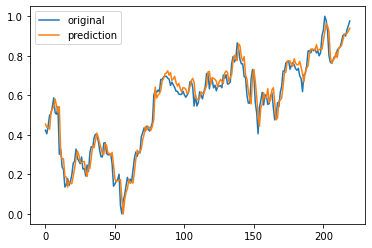

In [12]:
plt.plot(testY)
plt.plot(net(testX_tensor).data.numpy())
plt.legend(['original', 'prediction'])
plt.show()